# Evaluate extracted TOC

## Get Data

### Get the ground truth (GT) and create the hierarchy format needed for the edit tree distance computed by zss

In [1]:
import string
from zss import simple_distance, Node
import traceback
from collections import defaultdict
import os
section_gt=defaultdict(list)
gt_dict={}
depth_dict={}
maxi=defaultdict(list)
for f in sorted(os.listdir("./data/GT_TOCs/")):
    if f.endswith(".toc"): 
        print(f[:-4])
        try:
            gt_list=[]
            with open(str("./data/GT_TOCs/"+f), "r", encoding='utf-8-sig') as toc:
                gt_toc=toc.readlines()
                gt_list.append(str('Node("root")'))
                prev=0
                maximum=0
                for gt in gt_toc:
                    section_gt[f[:-4]].append(gt.split(",")[1].strip("\r\n").strip("\n").replace("/", "").replace("“", "").replace("”","").replace("’", "").replace(")", "").replace("(", "").replace('"', "").replace("'", ""))

                    if int(gt.split(",")[0])>maximum:
                        maximum=int(gt.split(",")[0])
                    if prev==int(gt.split(",")[0]):
                         gt_list.append(str(').addkid(Node("'+gt.split(",")[1].strip("\r\n").strip("\n").replace("/", "").replace("“", "").replace("”","").replace("’", "").replace(")", "").replace("(", "").replace('"', "").replace("'", "")+'")'))
                    elif prev<int(gt.split(",")[0]):
                        gt_list.append(str('.addkid(Node("'+gt.split(",")[1].strip("\r\n").strip("\n").replace("/", "").replace("“", "").replace("”","").replace("’", "").replace(")", "").replace("(", "").replace('"', "").replace("'", "")+'")'))
                    elif prev>int(gt.split(",")[0]):
                        for x in range(prev-int(gt.split(',')[0])+1):
                            gt_list.append(')')
                        gt_list.append(str('.addkid(Node("'+gt.split(",")[1].strip("\r\n").strip("\n").replace("/", "").replace("“", "").replace("”","").replace("’", "").replace(")", "").replace("(", "").replace('"', "").replace("'", "")+'")'))  
                    prev=int(gt.split(",")[0])
                for x in range(int(gt_toc[-1].split(',')[0])):
                            gt_list.append(')')
            gt_hierarchy="".join(gt_list)
            gt_dict[f[:-4]]=gt_hierarchy  
            depth_dict[f[:-4]]=maximum
            maxi[maximum].append(f[:-4])
        except Exception:
            print(traceback.format_exc())
            print("fail")
            #input()

6-traditional-medicines-law-and-the-dis-ordering-of-temporalities
a-bird-that-flies-with-two-wings-kastom-and-state-justice-systems-in-vanuatu
a-kind-of-mending-restorative-justice-in-the-pacific-islands
access-controlled-the-shaping-of-power-rights-and-rule-in-cyberspace
access-to-justice-and-legal-empowerment-making-the-poor-central-in-legal-development-co-operati
access-to-knowledge-in-the-age-of-intellectual-property
accountability-and-the-law-rights-authority-and-transparency-of-public-power
administrative-decision-making-in-australian-migration-l
advancing-equality-how-constitutional-rights-can-make-a-difference-worldwide
aegis-or-achilles-heel-the-dilemma-of-homology-in-biopatents-in-the-wake-of-novozymes
agriculture-and-food-security-in-china-what-effect-wto-accession-and-regional-trade-arrangements
al-haq-a-global-history-of-the-first-palestinian-human-rights-organizati
amicus-curiae-before-international-courts-and-tribunals
analogy-and-exemplary-reasoning-in-legal-discourse
a

### TOC-based PageParser

In [5]:
pdfstructure_depth={}
pdfstructure_dict={}
section_toc=defaultdict(list)
for f in sorted(os.listdir("./toc-based-page-parser/TOCs/")):
    if f.endswith(".toc"): 
        print(f[:-4].rstrip(string.digits).rstrip("_"))
        try:
            pdfstructure_list=[]
            with open(str("./toc-based-page-parser/TOCs/"+f), "r", encoding='utf-8-sig') as pdfstruct:
                pdfstructure=pdfstruct.readlines()
                pdfstructure_list.append(str('Node("root")'))
                prev=0
                maximum=0
                for pd in pdfstructure:
                    section_toc[f[:-4]].append(pd.split(",")[1].strip("\r\n").strip("\n").replace("/", "").replace("“", "").replace("”","").replace("’", "").replace(")", "").replace("(", "").replace('"', "").replace("'", ""))

                    if int(pd.split(",")[0])>maximum:
                        maximum=int(pd.split(",")[0])
                    if prev==int(pd.split(",")[0]):
                         pdfstructure_list.append(str(').addkid(Node("'+pd.split(",")[1].strip("\r\n").strip("\n").replace("/", "").replace("“", "").replace("”","").replace("’", "").replace(")", "").replace("(", "").replace('"', "").replace("'", "")+'")'))
                    elif prev<int(pd.split(",")[0]):
                        pdfstructure_list.append(str('.addkid(Node("'+pd.split(",")[1].strip("\r\n").strip("\n").replace("/", "").replace("“", "").replace("”","").replace("’", "").replace(")", "").replace("(", "").replace('"', "").replace("'", "")+'")'))
                    elif prev>int(pd.split(",")[0]):
                        for x in range(prev-int(pd.split(",")[0])+1):
                            pdfstructure_list.append(')')
                        pdfstructure_list.append(str('.addkid(Node("'+pd.split(",")[1].strip("\r\n").strip("\n").replace("/", "").replace("“", "").replace("”","").replace("’", "").replace(")", "").replace("(", "").replace('"', "").replace("'", "")+'")'))  
                    prev=int(pd.split(",")[0])
                for x in range(int(pdfstructure[-1].split(",")[0])):
                            pdfstructure_list.append(')')
            pdfstructure_hierarchy="".join(pdfstructure_list)
            pdfstructure_depth[f[:-4]]=maximum+1
            pdfstructure_dict[f[:-4]]=pdfstructure_hierarchy
        except Exception:
            print(traceback.format_exc())
            print("fail")
            #input()

6-traditional-medicines-law-and-the-dis-ordering-of-temporalities
a-bird-that-flies-with-two-wings-kastom-and-state-justice-systems-in-vanuatu
a-kind-of-mending-restorative-justice-in-the-pacific-islands
access-controlled-the-shaping-of-power-rights-and-rule-in-cyberspace
access-to-justice-and-legal-empowerment-making-the-poor-central-in-legal-development-co-operati
access-to-knowledge-in-the-age-of-intellectual-property
accountability-and-the-law-rights-authority-and-transparency-of-public-power
administrative-decision-making-in-australian-migration-l
advancing-equality-how-constitutional-rights-can-make-a-difference-worldwide
aegis-or-achilles-heel-the-dilemma-of-homology-in-biopatents-in-the-wake-of-novozymes
agriculture-and-food-security-in-china-what-effect-wto-accession-and-regional-trade-arrangements
al-haq-a-global-history-of-the-first-palestinian-human-rights-organizati
amicus-curiae-before-international-courts-and-tribunals
analogy-and-exemplary-reasoning-in-legal-discourse
a

### PDFStructure Parser

In [6]:
section_pds=defaultdict(list)

for f in os.listdir("./pdfstructure-master/hierarchies/"):
    if f.endswith(".txt") and str(f[:-4]+".toc") in os.listdir("./data/GT_TOCs/"): 
        print(f)
        try:
            with open(str("./pdfstructure-master/hierarchies/"+f), "r", encoding='utf-8-sig') as pdfstruct:
                pdfst=eval(pdfstruct.read())
                for pd in pdfst:
                    section_pds[f[:-4]].append(pd[1].strip("\r\n").strip("\n").replace("/", "").replace("“", "").replace("”","").replace("’", "").replace(")", "").replace("(", "").replace('"', "").replace("'", ""))
                    
        except Exception:
            print(traceback.format_exc())
            print("fail")
            input()

antitrust-enforcement-and-standard-essential-patents-moving-beyond-the-frand-commitment.txt
applicable-law-in-investor-state-arbitrati.txt
applying-shari-a-in-the-west-facts-fears-and-the-future-of-islamic-rules-on-family-relations-in-the-west.txt
necessity-or-nuisance-recourse-to-human-rights-in-substantive-international-criminal-l.txt
introduction-to-swiss-l.txt
amicus-curiae-before-international-courts-and-tribunals.txt
consumer-data-protection-in-brazil-china-and-germany-a-comparative-study.txt
u-s-federal-income-taxation-of-individuals-2016.txt
australian-clinical-legal-education-designing-and-operating-a-best-practice-clinical-program-in-an-australian-law-sch.txt
brexit-and-the-future-of-eu-politics-a-constitutional-law-perspective.txt
revisiting-chinas-competition-law-and-its-interaction-with-intellectual-property-rights.txt
aegis-or-achilles-heel-the-dilemma-of-homology-in-biopatents-in-the-wake-of-novozymes.txt
basic-income-tax-2016-2017.txt
access-to-justice-and-legal-empower

## Calculate ETD for the TOC-based PageParser

In [7]:
print(len(gt_dict.keys()))
print(len(pdfstructure_dict.keys()))
print(len(depth_dict.keys()))
print(len(pdfstructure_depth.keys()))
import csv
dist=None
etd={}
with open("evaluation_hierarchy_toc.csv", "w", encoding="utf-8-sig") as file:
    writer = csv.writer(file)
    writer.writerow(["File", "Edit Tree Distance", "GT_Depth", "TOC_Depth"])
    for k in gt_dict.keys():
        try:
            print(k)
            dist=simple_distance(eval(pdfstructure_dict[k]), eval(gt_dict[k]))
            print(dist)
            etd[k]=dist
            writer.writerow([k, dist, depth_dict[k], pdfstructure_depth[k]])

        except Exception:
            print(traceback.format_exc())
            print("fail")
            
            continue

49
259
49
259
6-traditional-medicines-law-and-the-dis-ordering-of-temporalities
344.0
a-bird-that-flies-with-two-wings-kastom-and-state-justice-systems-in-vanuatu
49.0
a-kind-of-mending-restorative-justice-in-the-pacific-islands
5739.0
access-controlled-the-shaping-of-power-rights-and-rule-in-cyberspace
6323.0
access-to-justice-and-legal-empowerment-making-the-poor-central-in-legal-development-co-operati
665.0
access-to-knowledge-in-the-age-of-intellectual-property
6026.0
accountability-and-the-law-rights-authority-and-transparency-of-public-power
4391.0
administrative-decision-making-in-australian-migration-l
6038.0
advancing-equality-how-constitutional-rights-can-make-a-difference-worldwide
16714.0
aegis-or-achilles-heel-the-dilemma-of-homology-in-biopatents-in-the-wake-of-novozymes
273.0
agriculture-and-food-security-in-china-what-effect-wto-accession-and-regional-trade-arrangements
6684.0
al-haq-a-global-history-of-the-first-palestinian-human-rights-organizati
1251.0
amicus-curiae-

## Calculate P and R

### for TOC-based Pageparser

In [8]:
from Levenshtein import distance
# Precision
prec = {}
tolprec = {}

for k in section_gt.keys():
    try: 
        tp = 0
        fp = 0
        toltp = 0
        tolfp = 0
        
        for v in section_toc.get(k, []):
            if v in section_gt.get(k, []):
                tp += 1
            else:
                fp += 1
            
            dists = [distance(v, value) for value in section_gt.get(k, [])]
            if dists and min(dists) < 2:
                toltp += 1
            else:
                tolfp += 1

        prec[k] = tp / (tp + fp) if (tp + fp) > 0 else 0.0
        tolprec[k] = toltp / (toltp + tolfp) if (toltp + tolfp) > 0 else 0.0
    
    except ZeroDivisionError:
        prec[k] = 0.0
        tolprec[k] = 0.0

print("Precision:", prec.values()) 
print("Tolerant Precision:", tolprec.values()) 
    
# Recall
rec = {}
tolrec = {}

for k in section_gt.keys():
    try:
        tp = 0
        fn = 0
        toltp = 0
        tolfn = 0
        
        for v in section_gt.get(k, []):
            if v in section_toc.get(k, []):
                tp += 1
            else:
                fn += 1
            
            dists = [distance(v, value) for value in section_toc.get(k, [])]
            if dists and min(dists) < 2:
                toltp += 1
            else:
                tolfn += 1

        rec[k] = tp / (tp + fn) if (tp + fn) > 0 else 0.0
        tolrec[k] = toltp / (toltp + tolfn) if (toltp + tolfn) > 0 else 0.0

    except ZeroDivisionError:
        rec[k] = 0.0
        tolrec[k] = 0.0

print("Recall:", rec.values()) 
print("Tolerant Recall:", tolrec.values())

Precision: dict_values([0.0, 1.0, 0.0, 1.0, 0.7142857142857143, 0.9714285714285714, 0.7272727272727273, 0.6666666666666666, 0.8461538461538461, 0.96875, 0.9473684210526315, 0.1346153846153846, 0.9952830188679245, 0.26666666666666666, 0.6388888888888888, 0.5230769230769231, 0.7058823529411765, 0.8666666666666667, 0.9036697247706422, 0.41025641025641024, 0.06, 0.9494949494949495, 0.22580645161290322, 0.993006993006993, 0.984375, 0.9052631578947369, 0.9446640316205533, 0.963302752293578, 0.9818181818181818, 0.9552631578947368, 0.46394984326018807, 0.9865771812080537, 0.9924812030075187, 0.8585858585858586, 0.905982905982906, 0.9006211180124224, 0.15, 0.9824561403508771, 0.9964028776978417, 0.8557213930348259, 0.8955223880597015, 0.9578947368421052, 0.9882352941176471, 0.9975669099756691, 0.9051094890510949, 0.9864864864864865, 0.8269662921348314, 0.9139072847682119, 0.8173076923076923])
Tolerant Precision: dict_values([0.0, 1.0, 0.6153846153846154, 1.0, 1.0, 1.0, 0.7272727272727273, 0.666

In [9]:
#we again calculate the metrics also per level
print(maxi.keys())

precision_2=[]
precision_3=[]
precision_4=[]
precision_5=[]
precision_6=[]
precision_7=[]

recall_2=[]
recall_3=[]
recall_4=[]
recall_5=[]
recall_6=[]
recall_7=[]

etd_2=[]
etd_3=[]
etd_4=[]
etd_5=[]
etd_6=[]
etd_7=[]

tolprecision_2=[]
tolprecision_3=[]
tolprecision_4=[]
tolprecision_5=[]
tolprecision_6=[]
tolprecision_7=[]

tolrecall_2=[]
tolrecall_3=[]
tolrecall_4=[]
tolrecall_5=[]
tolrecall_6=[]
tolrecall_7=[]

etd_by_level=defaultdict(list)
for f in maxi[2]:
    precision_2.append(prec[f]) 
    tolprecision_2.append(tolprec[f]) 
    recall_2.append(rec[f]) 
    tolrecall_2.append(tolrec[f]) 
    etd_2.append(etd[f])
    etd_by_level[2].append((f, etd[f]))
    
for f in maxi[3]:
    precision_3.append(prec[f]) 
    tolprecision_3.append(tolprec[f])
    recall_3.append(rec[f]) 
    tolrecall_3.append(tolrec[f]) 
    etd_3.append(etd[f])
    etd_by_level[3].append((f, etd[f]))
    
for f in maxi[4]:
    precision_4.append(prec[f]) 
    tolprecision_4.append(tolprec[f])
    recall_4.append(rec[f]) 
    tolrecall_4.append(tolrec[f]) 
    etd_4.append(etd[f])
    etd_by_level[4].append((f, etd[f]))
    
for f in maxi[5]:
    precision_5.append(prec[f]) 
    tolprecision_5.append(tolprec[f])
    recall_5.append(rec[f]) 
    tolrecall_5.append(tolrec[f]) 
    etd_5.append(etd[f])
    etd_by_level[5].append((f, etd[f]))
    
for f in maxi[6]:
    precision_6.append(prec[f]) 
    tolprecision_6.append(tolprec[f])
    recall_6.append(rec[f]) 
    tolrecall_6.append(tolrec[f]) 
    etd_6.append(etd[f])
    etd_by_level[6].append((f, etd[f]))
    
for f in maxi[7]:
    print(f)
    precision_7.append(prec[f]) 
    tolprecision_7.append(tolprec[f])
    recall_7.append(rec[f]) 
    tolrecall_7.append(tolrec[f]) 
    etd_7.append(etd[f])
    etd_by_level[7].append((f, etd[f]))
    
print(precision_7)
print(tolprecision_7)
    
    

dict_keys([2, 4, 3, 5, 7, 6])
amicus-curiae-before-international-courts-and-tribunals
employee-participation-and-collective-bargaining-in-europe-and-chi
industrial-concentration-and-the-chicago-school-of-antitrust-analysis
intellectual-property-in-the-global-arena-jurisdiction-applicable-law-and-the-recognition-of-judgments-in-europe-japan-and-the-us
necessity-or-nuisance-recourse-to-human-rights-in-substantive-international-criminal-l
refining-child-pornography-law-crime-language-and-social-consequences
the-law-applicable-to-security-interests-in-intermediated-securities-under-ohada-l
the-principle-of-purpose-limitation-in-data-protection-laws-the-risk-based-approach-principles-and-private-standards-as-elements-for-regulating-innovati
[0.9952830188679245, 0.9446640316205533, 0.9818181818181818, 0.9552631578947368, 0.9865771812080537, 0.15, 0.9882352941176471, 0.9975669099756691]
[0.9952830188679245, 0.9446640316205533, 0.9818181818181818, 0.9578947368421052, 0.9865771812080537, 0.15, 

### for PDFStructure parser

In [10]:
from Levenshtein import distance

# Precision
pdsprec={}
pdstolprec={}

for k in section_gt.keys():
  try: 
    tp=0
    fp=0
    toltp=0
    tolfp=0
    for v in section_pds.get(k, []):
        if v in section_gt.get(k, []):
            tp+=1
        else:
            fp+=1
        dists = [distance(v, value) for value in section_gt.get(k, [])]
        for value in section_gt[k]:
            dists.append(distance(v,value))
        if dists and min(dists) < 2:
                toltp+=1
            
        else:
            tolfp+=1
    pdsprec[k] = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    pdstolprec[k] = toltp / (toltp + tolfp) if (toltp + tolfp) > 0 else 0.0

  except ZeroDivisionError:
    pdsprec[k]=0.0
    pdstolprec[k]=0.0

print("Precision:", pdsprec.values()) 
print("Tolerant Precision:", pdstolprec.values()) 
    
# Recall
pdsrec={}
pdstolrec={}

for k in section_gt.keys():
    try:
        tp=0
        fn=0
        toltp=0
        tolfn=0
        for v in section_gt.get(k, []):
            if v in section_pds.get(k, []):
                tp+=1
            else:
                fn+=1
            dists = [distance(v, value) for value in section_pds.get(k, [])]
            if dists and min(dists) < 2:
                    toltp+=1
            else:
                tolfn+=1
            #ind=dists.index(min(dists))
            #print(dists[ind])
        pdsrec[k]=tp / (tp + fn) if (tp + fn) > 0 else 0.0
        pdstolrec[k]=toltp / (toltp + tolfn) if (toltp + tolfn) > 0 else 0.0
    except ZeroDivisionError:
        pdsrec[k]=0.0
        pdstolrec[k]=0.0

print("Recall:", pdsrec.values()) 
print("Tolerant Recall:", pdstolrec.values())




Precision: dict_values([0.0, 0.42160278745644597, 0.8052631578947368, 0.8518518518518519, 0.5, 0.23728813559322035, 0.0, 0.8457446808510638, 0.0, 0.0, 0.20464135021097046, 0.6428571428571429, 0.2987390882638215, 0.14655172413793102, 0.0, 0.7734375, 0.14814814814814814, 0.6752136752136753, 0.0, 0.08099688473520249, 0.0, 0.5705521472392638, 0.27906976744186046, 0.11042944785276074, 0.059602649006622516, 0.041666666666666664, 0.27635327635327633, 0.37530864197530867, 0.0, 0.109375, 0.07092198581560284, 0.14285714285714285, 0.0, 0.0, 0.04779411764705882, 0.48148148148148145, 0.16216216216216217, 0.0, 0.6220472440944882, 0.11428571428571428, 0.33480176211453744, 0.68, 0.1372854914196568, 0.0, 0.07802874743326489, 0.21481481481481482, 0.2526843235504653, 0.0, 0.2948717948717949])
Tolerant Precision: dict_values([0.0, 0.42857142857142855, 0.8526315789473684, 0.9259259259259259, 0.5833333333333334, 0.288135593220339, 0.0, 0.851063829787234, 0.0, 0.0, 0.2616033755274262, 0.6428571428571429, 0.3

In [11]:
print(maxi.keys())

pdsprecision_2=[]
pdsprecision_3=[]
pdsprecision_4=[]
pdsprecision_5=[]
pdsprecision_6=[]
pdsprecision_7=[]

pdsrecall_2=[]
pdsrecall_3=[]
pdsrecall_4=[]
pdsrecall_5=[]
pdsrecall_6=[]
pdsrecall_7=[]



pdstolprecision_2=[]
pdstolprecision_3=[]
pdstolprecision_4=[]
pdstolprecision_5=[]
pdstolprecision_6=[]
pdstolprecision_7=[]

pdstolrecall_2=[]
pdstolrecall_3=[]
pdstolrecall_4=[]
pdstolrecall_5=[]
pdstolrecall_6=[]
pdstolrecall_7=[]

for f in maxi[2]:
    pdsprecision_2.append(pdsprec[f]) 
    pdstolprecision_2.append(pdstolprec[f]) 
    pdsrecall_2.append(pdsrec[f]) 
    pdstolrecall_2.append(pdstolrec[f]) 
    
    
for f in maxi[3]:
    pdsprecision_3.append(pdsprec[f]) 
    pdstolprecision_3.append(pdstolprec[f])
    pdsrecall_3.append(pdsrec[f]) 
    pdstolrecall_3.append(pdstolrec[f]) 

    
for f in maxi[4]:
    pdsprecision_4.append(pdsprec[f]) 
    pdstolprecision_4.append(pdstolprec[f])
    pdsrecall_4.append(pdsrec[f]) 
    pdstolrecall_4.append(pdstolrec[f]) 
    
for f in maxi[5]:
    pdsprecision_5.append(pdsprec[f]) 
    pdstolprecision_5.append(pdstolprec[f])
    pdsrecall_5.append(pdsrec[f]) 
    pdstolrecall_5.append(pdstolrec[f]) 
   
for f in maxi[6]:
    pdsprecision_6.append(pdsprec[f]) 
    pdstolprecision_6.append(pdstolprec[f])
    pdsrecall_6.append(pdsrec[f]) 
    pdstolrecall_6.append(pdstolrec[f]) 
   
    
for f in maxi[7]:
    print(f)
    pdsprecision_7.append(pdsprec[f]) 
    pdstolprecision_7.append(pdstolprec[f])
    pdsrecall_7.append(pdsrec[f]) 
    pdstolrecall_7.append(pdstolrec[f]) 
   
    
print(pdsprecision_7)
print(pdstolprecision_7)
    

dict_keys([2, 4, 3, 5, 7, 6])
amicus-curiae-before-international-courts-and-tribunals
employee-participation-and-collective-bargaining-in-europe-and-chi
industrial-concentration-and-the-chicago-school-of-antitrust-analysis
intellectual-property-in-the-global-arena-jurisdiction-applicable-law-and-the-recognition-of-judgments-in-europe-japan-and-the-us
necessity-or-nuisance-recourse-to-human-rights-in-substantive-international-criminal-l
refining-child-pornography-law-crime-language-and-social-consequences
the-law-applicable-to-security-interests-in-intermediated-securities-under-ohada-l
the-principle-of-purpose-limitation-in-data-protection-laws-the-risk-based-approach-principles-and-private-standards-as-elements-for-regulating-innovati
[0.2987390882638215, 0.27635327635327633, 0.0, 0.109375, 0.14285714285714285, 0.16216216216216217, 0.1372854914196568, 0.0]
[0.36081474296799226, 0.6438746438746439, 0.0, 0.5911458333333334, 0.14285714285714285, 0.16216216216216217, 0.5413416536661466, 0

### TOC-based Pageparser final figure

/home/sabine/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sabine/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sabine/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sabine/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

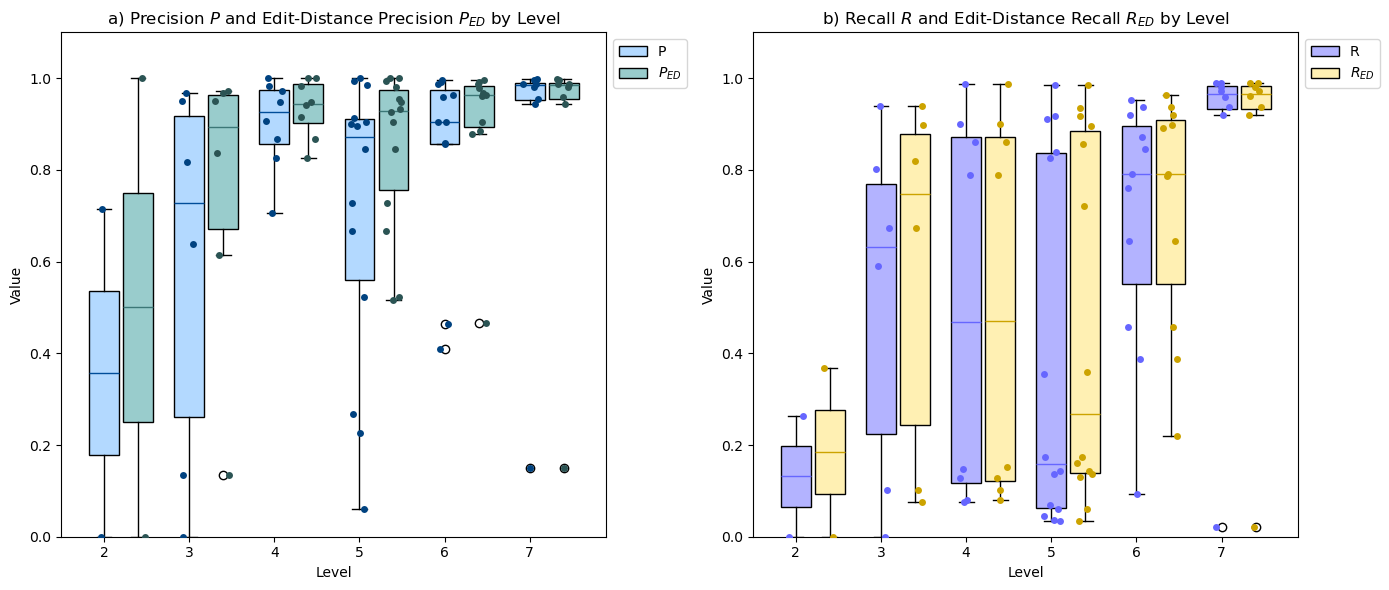

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches

# Assuming precision and recall related data are defined
# precision_2, precision_3, ..., recall_2, recall_3, ...

# Define precision and tolprecision dictionaries
precision = {
    '2': precision_2,
    '3': precision_3,
    '4': precision_4,
    '5': precision_5,
    '6': precision_6,
    '7': precision_7
}

tolprecision = {
    '2': tolprecision_2,
    '3': tolprecision_3,
    '4': tolprecision_4,
    '5': tolprecision_5,
    '6': tolprecision_6,
    '7': tolprecision_7
}

# Define recall and tolrecall dictionaries
recall = {
    '2': recall_2,
    '3': recall_3,
    '4': recall_4,
    '5': recall_5,
    '6': recall_6,
    '7': recall_7
}

tolrecall = {
    '2': tolrecall_2,
    '3': tolrecall_3,
    '4': tolrecall_4,
    '5': tolrecall_5,
    '6': tolrecall_6,
    '7': tolrecall_7
}

# Grouping levels
levels = ['2', '3', '4', '5', '6', '7']

# Data for boxplots
precision_data = [precision[level] for level in levels]
tolprecision_data = [tolprecision[level] for level in levels]
recall_data = [recall[level] for level in levels]
tolrecall_data = [tolrecall[level] for level in levels]

# Flatten the precision and tolprecision data
precision_data_flat = [val for sublist in precision_data for val in sublist]
tolprecision_data_flat = [val for sublist in tolprecision_data for val in sublist]
recall_data_flat = [val for sublist in recall_data for val in sublist]
tolrecall_data_flat = [val for sublist in tolrecall_data for val in sublist]

# Define custom facecolors using HTML color codes
precision_facecolor = '#b3d9ff'  # Light Blue
tolprecision_facecolor = '#99cccc'  # Light Bluegreen
recall_facecolor = '#b3b3ff'  # Light purple
tolrecall_facecolor = '#fff0b3'  # Light orange
edgecolor = 'black'  # Black outline color

# Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Precision
precision_boxes = ax1.boxplot(precision_data, positions=range(2, len(levels) + 2), widths=0.35, patch_artist=True, boxprops=dict(facecolor=precision_facecolor, edgecolor=edgecolor), medianprops=dict(color='blue'))
tolprecision_boxes = ax1.boxplot(tolprecision_data, positions=[x + 0.4 for x in range(2, len(levels) + 2)], widths=0.35, patch_artist=True, boxprops=dict(facecolor=tolprecision_facecolor, edgecolor=edgecolor), medianprops=dict(color='red'))

# Overlay stripplot for precision
sns.stripplot(x=np.repeat(range(2, len(levels) + 2), [len(data) for data in precision_data]), y=precision_data_flat, native_scale=True, color='#004280', ax=ax1, jitter=True, size=5)
sns.stripplot(x=np.repeat([x + 0.4 for x in range(2, len(levels) + 2)], [len(data) for data in tolprecision_data]), y=tolprecision_data_flat, native_scale=True, color='#2b5454', ax=ax1, jitter=True, size=5)

# Set y-axis limits
ax1.set_ylim(0, 1.1)
ax1.set_xlabel('Level')
ax1.set_xticks(range(2, len(levels) + 2))
ax1.set_xticklabels(levels)
ax1.set_ylabel('Value')
ax1.set_title('a) Precision $P$ and Edit-Distance Precision $P_{ED}$ by Level')

# Create legend
precision_patch = mpatches.Patch(facecolor=precision_facecolor, edgecolor=edgecolor, label='P')
tolprecision_patch = mpatches.Patch(facecolor=tolprecision_facecolor, edgecolor=edgecolor, label='$P_{ED}$')
ax1.legend(handles=[precision_patch, tolprecision_patch], loc='upper left', bbox_to_anchor=(1, 1))

# Change median line colors
for median in precision_boxes['medians']:
    median.set(color='#004d99')
for median in tolprecision_boxes['medians']:
    median.set(color='#3c7777')

# Plot for Recall
recall_boxes = ax2.boxplot(recall_data, positions=range(2, len(levels) + 2), widths=0.35, patch_artist=True, boxprops=dict(facecolor=recall_facecolor, edgecolor=edgecolor), medianprops=dict(color='blue'))
tolrecall_boxes = ax2.boxplot(tolrecall_data, positions=[x + 0.4 for x in range(2, len(levels) + 2)], widths=0.35, patch_artist=True, boxprops=dict(facecolor=tolrecall_facecolor, edgecolor=edgecolor), medianprops=dict(color='red'))

# Overlay stripplot for recall
sns.stripplot(x=np.repeat(range(2, len(levels) + 2), [len(data) for data in recall_data]), y=recall_data_flat, native_scale=True, color='#6666ff', ax=ax2, jitter=True, size=5)
sns.stripplot(x=np.repeat([x + 0.4 for x in range(2, len(levels) + 2)], [len(data) for data in tolrecall_data]), y=tolrecall_data_flat, native_scale=True, color='#cca300', ax=ax2, jitter=True, size=5)

# Set y-axis limits
ax2.set_ylim(0, 1.1)
ax2.set_xlabel('Level')
ax2.set_xticks(range(2, len(levels) + 2))
ax2.set_xticklabels(levels)
ax2.set_ylabel('Value')
ax2.set_title('b) Recall $R$ and Edit-Distance Recall $R_{ED}$ by Level')

# Create legend
recall_patch = mpatches.Patch(facecolor=recall_facecolor, edgecolor=edgecolor, label='R')
tolrecall_patch = mpatches.Patch(facecolor=tolrecall_facecolor, edgecolor=edgecolor, label='$R_{ED}$')
ax2.legend(handles=[recall_patch, tolrecall_patch], loc='upper left', bbox_to_anchor=(1, 1))

# Change median line colors
for median in recall_boxes['medians']:
    median.set(color='#6666ff')
for median in tolrecall_boxes['medians']:
    median.set(color='#cca300')

plt.tight_layout()
plt.savefig("./combined_precision_recall_results.pdf", format="pdf", bbox_inches="tight")
plt.show()

## PDFStructure final figure

/home/sabine/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sabine/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sabine/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sabine/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

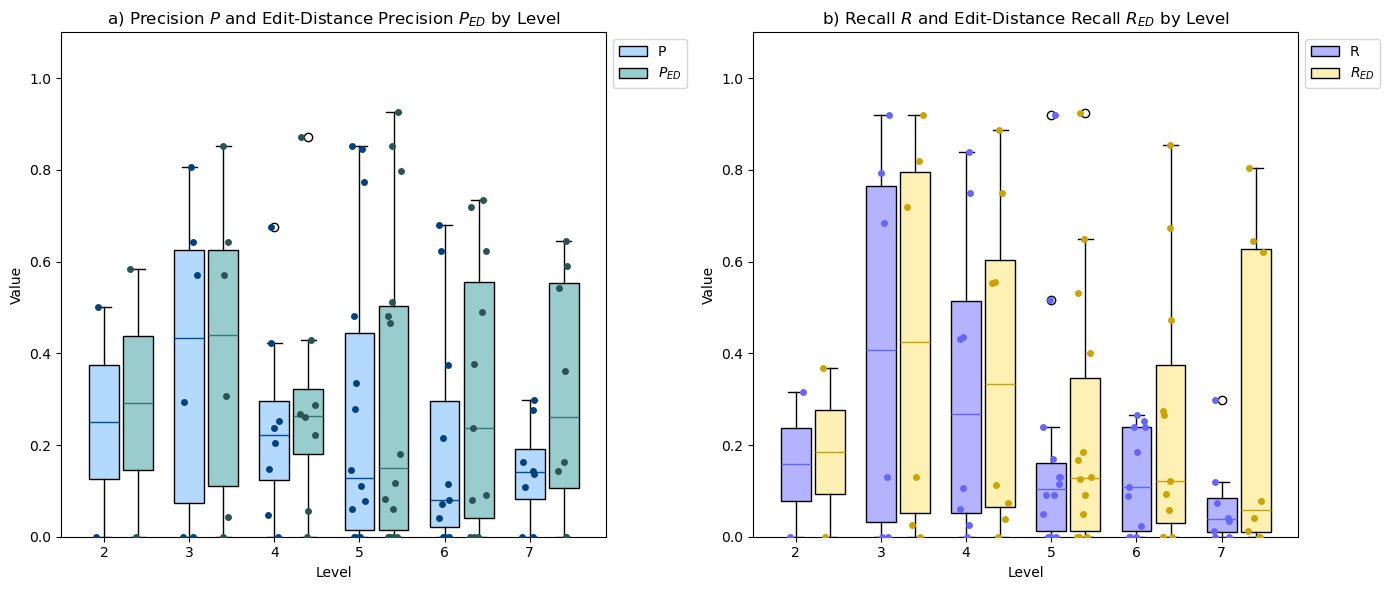

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches

# Assuming precision and recall related data are defined
# precision_2, precision_3, ..., recall_2, recall_3, ...

# Define precision and tolprecision dictionaries
precision = {
    '2': pdsprecision_2,
    '3': pdsprecision_3,
    '4': pdsprecision_4,
    '5': pdsprecision_5,
    '6': pdsprecision_6,
    '7': pdsprecision_7
}

tolprecision = {
    '2': pdstolprecision_2,
    '3': pdstolprecision_3,
    '4': pdstolprecision_4,
    '5': pdstolprecision_5,
    '6': pdstolprecision_6,
    '7': pdstolprecision_7
}

# Define recall and tolrecall dictionaries
recall = {
    '2': pdsrecall_2,
    '3': pdsrecall_3,
    '4': pdsrecall_4,
    '5': pdsrecall_5,
    '6': pdsrecall_6,
    '7': pdsrecall_7
}

tolrecall = {
    '2': pdstolrecall_2,
    '3': pdstolrecall_3,
    '4': pdstolrecall_4,
    '5': pdstolrecall_5,
    '6': pdstolrecall_6,
    '7': pdstolrecall_7
}

# Grouping levels
levels = ['2', '3', '4', '5', '6', '7']

# Data for boxplots
precision_data = [precision[level] for level in levels]
tolprecision_data = [tolprecision[level] for level in levels]
recall_data = [recall[level] for level in levels]
tolrecall_data = [tolrecall[level] for level in levels]

# Flatten the precision and tolprecision data
precision_data_flat = [val for sublist in precision_data for val in sublist]
tolprecision_data_flat = [val for sublist in tolprecision_data for val in sublist]
recall_data_flat = [val for sublist in recall_data for val in sublist]
tolrecall_data_flat = [val for sublist in tolrecall_data for val in sublist]

# Define custom facecolors using HTML color codes
precision_facecolor = '#b3d9ff'  # Light Blue
tolprecision_facecolor = '#99cccc'  # Light Bluegreen
recall_facecolor = '#b3b3ff'  # Light purple
tolrecall_facecolor = '#fff0b3'  # Light orange
edgecolor = 'black'  # Black outline color

# Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Precision
precision_boxes = ax1.boxplot(precision_data, positions=range(2, len(levels) + 2), widths=0.35, patch_artist=True, boxprops=dict(facecolor=precision_facecolor, edgecolor=edgecolor), medianprops=dict(color='blue'))
tolprecision_boxes = ax1.boxplot(tolprecision_data, positions=[x + 0.4 for x in range(2, len(levels) + 2)], widths=0.35, patch_artist=True, boxprops=dict(facecolor=tolprecision_facecolor, edgecolor=edgecolor), medianprops=dict(color='red'))

# Overlay stripplot for precision
sns.stripplot(x=np.repeat(range(2, len(levels) + 2), [len(data) for data in precision_data]), y=precision_data_flat, native_scale=True, color='#004280', ax=ax1, jitter=True, size=5)
sns.stripplot(x=np.repeat([x + 0.4 for x in range(2, len(levels) + 2)], [len(data) for data in tolprecision_data]), y=tolprecision_data_flat, native_scale=True, color='#2b5454', ax=ax1, jitter=True, size=5)

# Set y-axis limits
ax1.set_ylim(0, 1.1)
ax1.set_xlabel('Level')
ax1.set_xticks(range(2, len(levels) + 2))
ax1.set_xticklabels(levels)
ax1.set_ylabel('Value')
ax1.set_title('a) Precision $P$ and Edit-Distance Precision $P_{ED}$ by Level')

# Create legend
precision_patch = mpatches.Patch(facecolor=precision_facecolor, edgecolor=edgecolor, label='P')
tolprecision_patch = mpatches.Patch(facecolor=tolprecision_facecolor, edgecolor=edgecolor, label='$P_{ED}$')
ax1.legend(handles=[precision_patch, tolprecision_patch], loc='upper left', bbox_to_anchor=(1, 1))

# Change median line colors
for median in precision_boxes['medians']:
    median.set(color='#004d99')
for median in tolprecision_boxes['medians']:
    median.set(color='#3c7777')

# Plot for Recall
recall_boxes = ax2.boxplot(recall_data, positions=range(2, len(levels) + 2), widths=0.35, patch_artist=True, boxprops=dict(facecolor=recall_facecolor, edgecolor=edgecolor), medianprops=dict(color='blue'))
tolrecall_boxes = ax2.boxplot(tolrecall_data, positions=[x + 0.4 for x in range(2, len(levels) + 2)], widths=0.35, patch_artist=True, boxprops=dict(facecolor=tolrecall_facecolor, edgecolor=edgecolor), medianprops=dict(color='red'))

# Overlay stripplot for recall
sns.stripplot(x=np.repeat(range(2, len(levels) + 2), [len(data) for data in recall_data]), y=recall_data_flat, native_scale=True, color='#6666ff', ax=ax2, jitter=True, size=5)
sns.stripplot(x=np.repeat([x + 0.4 for x in range(2, len(levels) + 2)], [len(data) for data in tolrecall_data]), y=tolrecall_data_flat, native_scale=True, color='#cca300', ax=ax2, jitter=True, size=5)

# Set y-axis limits
ax2.set_ylim(0, 1.1)
ax2.set_xlabel('Level')
ax2.set_xticks(range(2, len(levels) + 2))
ax2.set_xticklabels(levels)
ax2.set_ylabel('Value')
ax2.set_title('b) Recall $R$ and Edit-Distance Recall $R_{ED}$ by Level')

# Create legend
recall_patch = mpatches.Patch(facecolor=recall_facecolor, edgecolor=edgecolor, label='R')
tolrecall_patch = mpatches.Patch(facecolor=tolrecall_facecolor, edgecolor=edgecolor, label='$R_{ED}$')
ax2.legend(handles=[recall_patch, tolrecall_patch], loc='upper left', bbox_to_anchor=(1, 1))

# Change median line colors
for median in recall_boxes['medians']:
    median.set(color='#6666ff')
for median in tolrecall_boxes['medians']:
    median.set(color='#cca300')

plt.tight_layout()
plt.savefig("./combined_precision_recall_results_pds.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Visualize ETD

In [14]:
import csv
dist=None
etd_ps={}
etd_ps_by_level=defaultdict(list)
etd_2_ps=[]
etd_3_ps=[]
etd_4_ps=[]
etd_5_ps=[]
etd_6_ps=[]
etd_7_ps=[]
# you need to generate this file first by running the script evaluate_hierarchies
with open("evaluation_hierarchy_pdfstructure.csv", "r", encoding="utf-8-sig") as file:
    reader = csv.reader(file)
    headers = next(reader)[1:]
    for row in reader:
        etd_ps[row[0]]=row[1]
        etd_ps_by_level[int(row[2])].append((row[0], float(row[1])))
        if int(row[2])==2:
            etd_2_ps.append(float(row[1]))
        if int(row[2])==3:
            etd_3_ps.append(float(row[1]))
        if int(row[2])==4:
            etd_4_ps.append(float(row[1]))
        if int(row[2])==5:
            etd_5_ps.append(float(row[1]))
        if int(row[2])==6:
            etd_6_ps.append(float(row[1]))
        if int(row[2])==7:
            etd_7_ps.append(float(row[1]))

In [15]:
import pandas as pd
df=pd.read_excel(open('./data/outline_prefixes.xlsx', 'rb'))
pub_df=df.drop(columns=["Publisher","Number","Alphabet","Roman", "Spelled Out", "Level Indication", "Section Sign", "No Prefix", "Level"])
pub_df['File'] = pub_df['File'].apply(lambda x: str(x)[:-4].lower())
pub_df["File"].unique()

array(['6-traditional-medicines-law-and-the-dis-ordering-of-temporalities',
       'a-bird-that-flies-with-two-wings-kastom-and-state-justice-systems-in-vanuatu',
       'a-kind-of-mending-restorative-justice-in-the-pacific-islands',
       'access-controlled-the-shaping-of-power-rights-and-rule-in-cyberspace',
       'access-to-justice-and-legal-empowerment-making-the-poor-central-in-legal-development-co-operati',
       'access-to-knowledge-in-the-age-of-intellectual-property',
       'accountability-and-the-law-rights-authority-and-transparency-of-public-power',
       'administrative-decision-making-in-australian-migration-l',
       'advancing-equality-how-constitutional-rights-can-make-a-difference-worldwide',
       'aegis-or-achilles-heel-the-dilemma-of-homology-in-biopatents-in-the-wake-of-novozymes',
       'agriculture-and-food-security-in-china-what-effect-wto-accession-and-regional-trade-arrangements',
       'al-haq-a-global-history-of-the-first-palestinian-human-rights-o

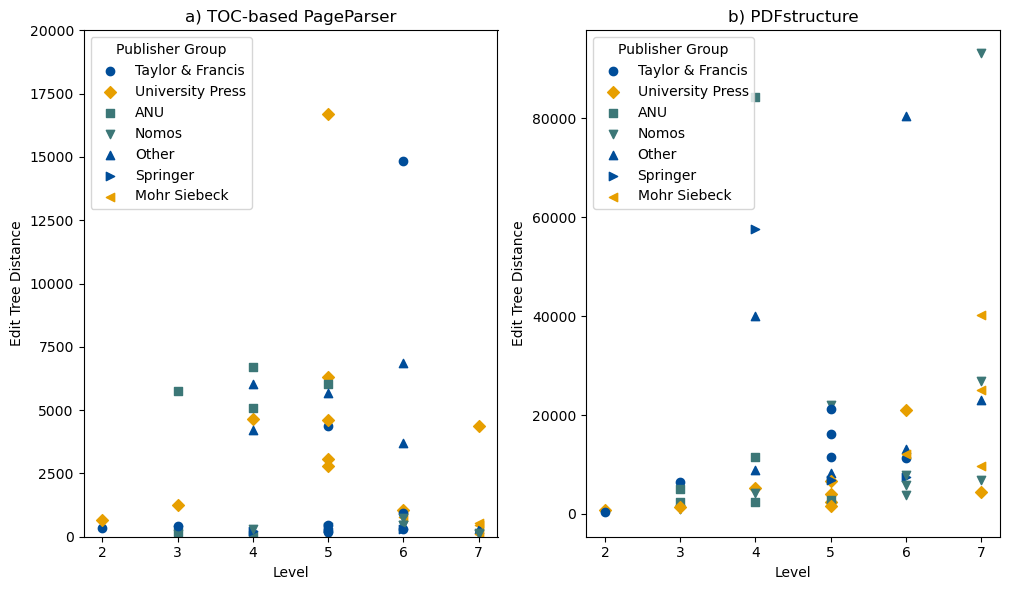

In [16]:
# Mapping of files to publishers
file_to_publisher = dict(zip(pub_df['File'], pub_df['Publisher Group']))

# Define markers and colors for each publisher group
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h']
colors = ['#004d99', '#3c7777', '#e79f00']  # Define unique colors for each publisher group
# Convert publishers to a list
publishers = list(pub_df['Publisher Group'].unique())
# Determine the common y-axis limits with a margin
all_values = [value for level_data in etd_by_level.values() for file, value in level_data] + \
             [value for level_data in etd_ps_by_level.values() for file, value in level_data]
y_min, y_max = min(all_values), max(all_values)
y_margin = (y_max - y_min) * 0.05  # 5% margin
y_min -= y_margin
y_max += y_margin

# Custom scale for figure a)
custom_y_min = 0
custom_y_max = 20000

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot data for TOC-based PageParser
for level, level_data in etd_by_level.items():
    for file, value in level_data:
        publisher = file_to_publisher[file]
        marker = markers[publishers.index(publisher) % len(markers)]
        color = colors[publishers.index(publisher) % len(colors)]
        ax1.scatter(int(level), value, color=color, marker=marker, label=publisher)

ax1.set_title('a) TOC-based PageParser')
ax1.set_xlabel('Level')
ax1.set_ylabel('Edit Tree Distance')
ax1.set_ylim(custom_y_min, custom_y_max)

# Plot data for PDFstructure
for level, level_data in etd_ps_by_level.items():
    for file, value in level_data:
        publisher = file_to_publisher[file]
        marker = markers[publishers.index(publisher) % len(markers)]
        color = colors[publishers.index(publisher) % len(colors)]
        ax2.scatter(int(level), value, color=color, marker=marker, label=publisher)

ax2.set_title('b) PDFstructure')
ax2.set_xlabel('Level')
ax2.set_ylabel('Edit Tree Distance')
ax2.set_ylim(y_min, y_max)

# Create a single legend for both plots
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine handles and labels while ensuring unique labels
unique_labels = []
unique_handles = []
for handle, label in zip(handles1 + handles2, labels1 + labels2):
    if label not in unique_labels:
        unique_labels.append(label)
        unique_handles.append(handle)

ax1.legend(unique_handles, unique_labels, title='Publisher Group', loc='upper left')
ax2.legend(unique_handles, unique_labels, title='Publisher Group', loc='upper left')

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust right space to accommodate legends
plt.savefig("./etd_results.pdf", format="pdf", bbox_inches="tight")
plt.show()